In [3]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Chemin vers le dataset FER2013
train_dir = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\train'

test_dir = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\test'

# Dossier des émotions
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Fonction pour compter les images dans chaque classe
def count_images(directory):
    image_counts = {}
    for emotion in emotions:
        emotion_folder = os.path.join(directory, emotion)
        num_images = len(os.listdir(emotion_folder))
        image_counts[emotion] = num_images
    return image_counts

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Afficher les résultats
print("Nombre d'images dans le dossier train:")
print(train_counts)

print("\nNombre d'images dans le dossier test:")
print(test_counts)


Nombre d'images dans le dossier train:
{'angry': 3993, 'disgust': 436, 'fear': 4103, 'happy': 7164, 'neutral': 4982, 'sad': 4938, 'surprise': 3205}

Nombre d'images dans le dossier test:
{'angry': 960, 'disgust': 111, 'fear': 1018, 'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}


In [6]:
import pandas as pd

# Convertir les résultats en DataFrame pour une meilleure présentation
train_df = pd.DataFrame(list(train_counts.items()), columns=['Emotion', 'Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Emotion', 'Count'])

# Statistiques descriptives pour le dataset d'entraînement
train_stats = train_df.describe()

# Statistiques descriptives pour le dataset de test
test_stats = test_df.describe()

print("Statistiques descriptives pour le dataset train:")
print(train_stats)

print("\nStatistiques descriptives pour le dataset test:")
print(test_stats)


Statistiques descriptives pour le dataset train:
             Count
count     7.000000
mean   4117.285714
std    2045.464553
min     436.000000
25%    3599.000000
50%    4103.000000
75%    4960.000000
max    7164.000000

Statistiques descriptives pour le dataset test:
             Count
count     7.000000
mean   1009.428571
std     513.068175
min     111.000000
25%     878.500000
50%    1018.000000
75%    1177.500000
max    1825.000000


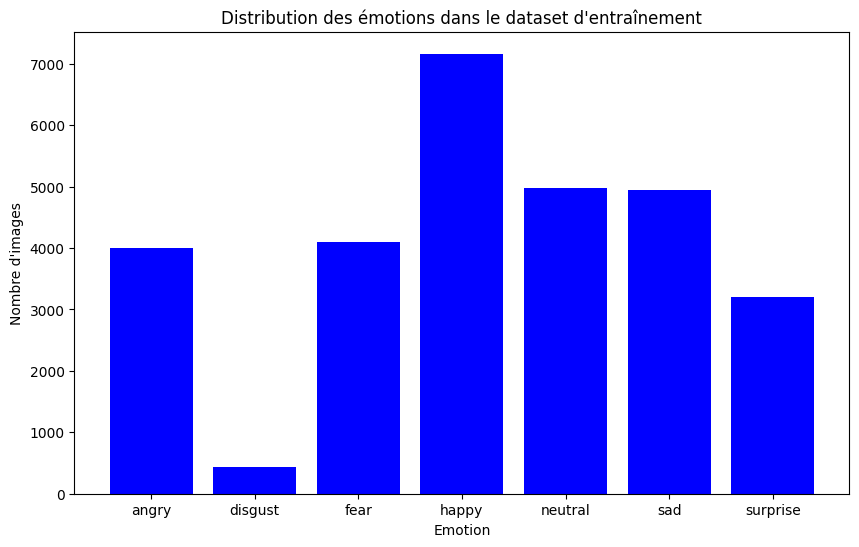

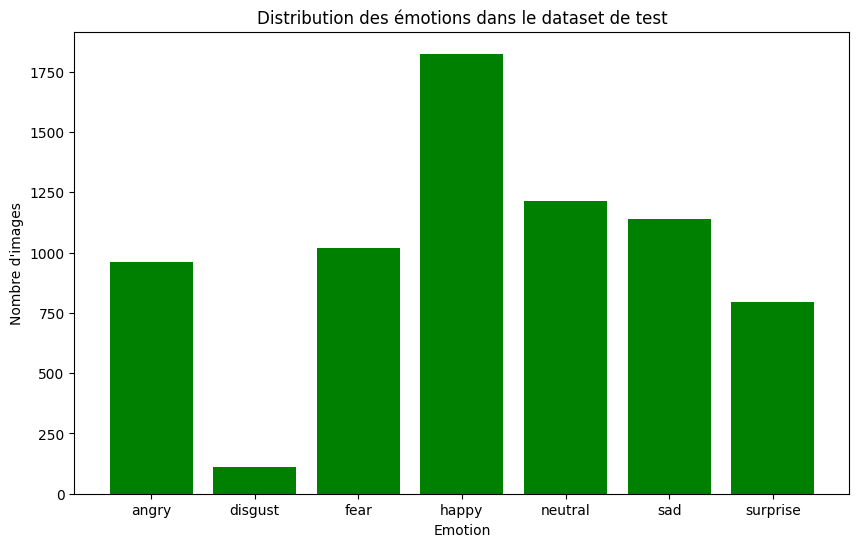

In [7]:
# Afficher la distribution des émotions dans le dataset d'entraînement
plt.figure(figsize=(10, 6))
plt.bar(train_counts.keys(), train_counts.values(), color='blue')
plt.xlabel('Emotion')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des émotions dans le dataset d\'entraînement')
plt.show()

# Afficher la distribution des émotions dans le dataset de test
plt.figure(figsize=(10, 6))
plt.bar(test_counts.keys(), test_counts.values(), color='green')
plt.xlabel('Emotion')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des émotions dans le dataset de test')
plt.show()


Exemples pour angry:


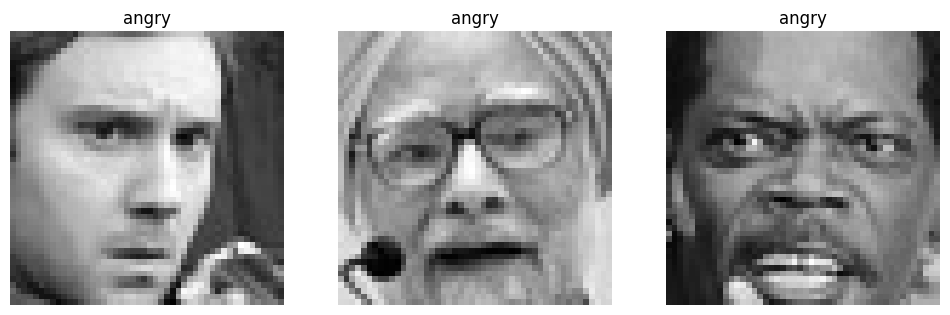

Exemples pour disgust:


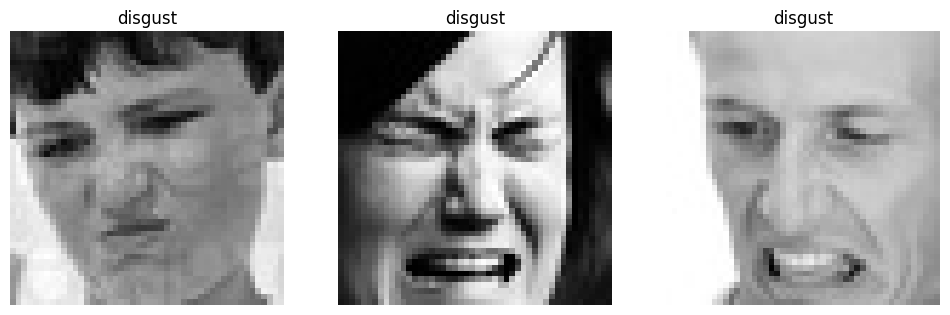

Exemples pour fear:


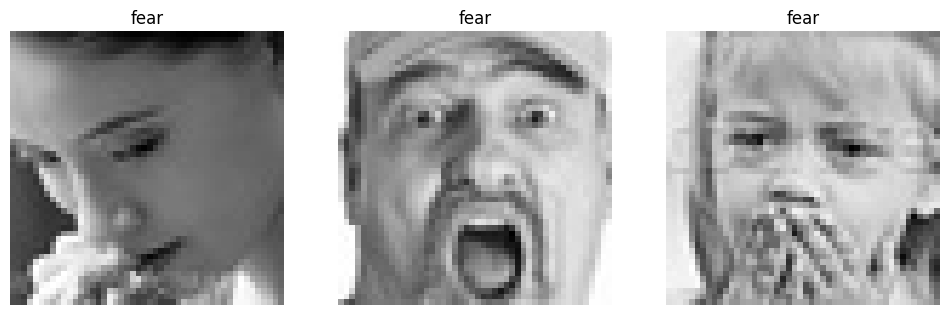

Exemples pour happy:


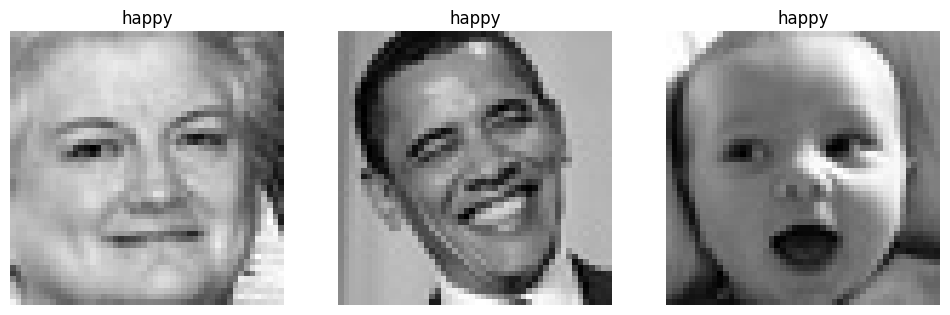

Exemples pour neutral:


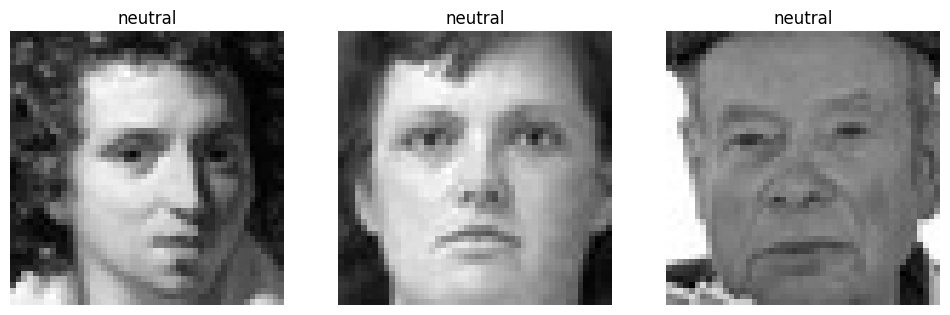

Exemples pour sad:


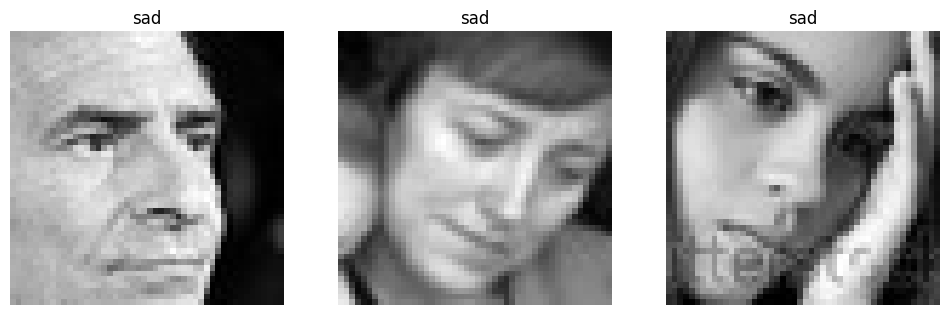

Exemples pour surprise:


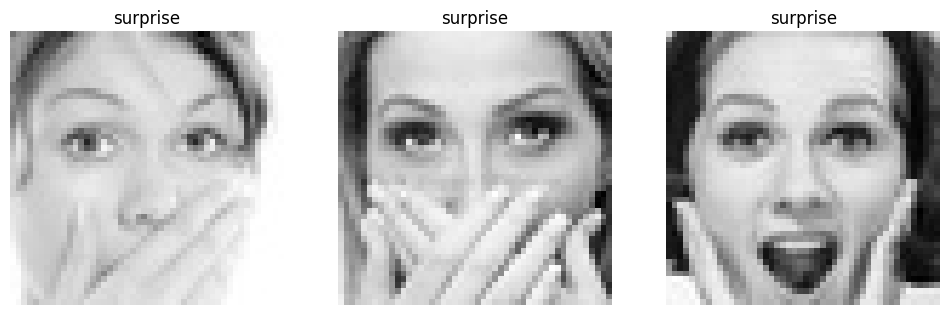

In [8]:
def show_example_images(directory, emotion, num_images=3):
    emotion_folder = os.path.join(directory, emotion)
    images = os.listdir(emotion_folder)[:num_images]  # Prendre les premières images
    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))
    for i, img_name in enumerate(images):
        img_path = os.path.join(emotion_folder, img_name)
        img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
        axes[i].imshow(np.array(img), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"{emotion}")
    plt.show()

# Afficher quelques exemples d'images de chaque émotion
for emotion in emotions:
    print(f"Exemples pour {emotion}:")
    show_example_images(train_dir, emotion)


In [9]:
TRAIN_DIR = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\train'
TEST_DIR = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\test'

In [10]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [11]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)

                                                   image     label
0      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
1      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
2      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
3      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
4      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
...                                                  ...       ...
28816  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
28817  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
28818  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
28819  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
28820  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise

[28821 rows x 2 columns]


In [12]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
1     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
2     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
3     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
4     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
...                                                 ...       ...
7061  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
7062  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
7063  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
7064  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
7065  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise

[7066 rows x 2 columns]
0       C:\Users\wanai\EmotionDetectionFacialExpressio...
1       C:\Users\wanai\EmotionDetectionFacialExpressio...
2       C:\Users\wanai\EmotionDetectionFacialExpressio...
3       C

In [13]:
from tqdm.notebook import tqdm

In [14]:
from keras.preprocessing.image import img_to_array

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")  # Use color_mode instead of grayscale
        img_array = img_to_array(img)  # Convert to array
        features.append(img_array)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Ensure correct shape
    return features


In [15]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [16]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [17]:
x_train = train_features/255.0
x_test = test_features/255.0

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [20]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [21]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# Step 1: Import required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model

# Step 2: Dataset paths
train_dir = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\train'
val_dir = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\test'

# Step 3: Data preprocessing and augmentation
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

# Step 4: Define CNN Model
def create_cnn():
    model = Sequential([
        Input(shape=(48, 48, 1)),  # Explicit input shape
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(7, activation='softmax')  # 7 classes for emotion detection
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Define VGG16 Model
def create_vgg16():
    base_model = VGG16(weights=None, include_top=False, input_shape=(48, 48, 1))
    x = Flatten()(base_model.output)
    x = Dense(64, activation='relu')(x)
    output = Dense(7, activation='softmax')(x)  # 7 classes
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 6: Define ResNet50 Model
def create_resnet50():
    base_model = ResNet50(weights=None, include_top=False, input_shape=(48, 48, 1))
    x = Flatten()(base_model.output)
    x = Dense(64, activation='relu')(x)
    output = Dense(7, activation='softmax')(x)  # 7 classes
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 7: Instantiate and train models
cnn_model = create_cnn()
cnn_history = cnn_model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=10
)

vgg16_model = create_vgg16()
vgg16_history = vgg16_model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=10
)

resnet50_model = create_resnet50()
resnet50_history = resnet50_model.fit(
    train_generator, 
    validation_data=val_generator, 
    epochs=10
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


C:\Users\wanai\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 1527s 3s/step - accuracy: 0.2840 - loss: 1.7598 - val_accuracy: 0.4002 - val_loss: 1.5651
Epoch 2/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 157s 349ms/step - accuracy: 0.4162 - loss: 1.5198 - val_accuracy: 0.4309 - val_loss: 1.4968
Epoch 3/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.4585 - loss: 1.4364 - val_accuracy: 0.4513 - val_loss: 1.4626
Epoch 4/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.4930 - loss: 1.3559 - val_accuracy: 0.4558 - val_loss: 1.4305
Epoch 5/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.5068 - loss: 1.3043 - val_accuracy: 0.4735 - val_loss: 1.4233
Epoch 6/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.5264 - loss: 1.2598 - val_accuracy: 0.4747 - val_loss: 1.4033
Epoch 7/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.5390 - loss: 1.2223 - val_accuracy: 0.4741 - val_loss: 1.4121
Epoch 8/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.5522 - loss: 1.1905

111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.4777 - loss: 1.3992
CNN Model - Loss: 1.4202051162719727, Accuracy: 0.46787431836128235
111/111 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.2567 - loss: 1.8054
VGG16 Model - Loss: 1.8101342916488647, Accuracy: 0.25827908515930176
111/111 ━━━━━━━━━━━━━━━━━━━━ 77s 690ms/step - accuracy: 0.2598 - loss: 1.8087
ResNet50 Model - Loss: 1.8090627193450928, Accuracy: 0.25827908515930176


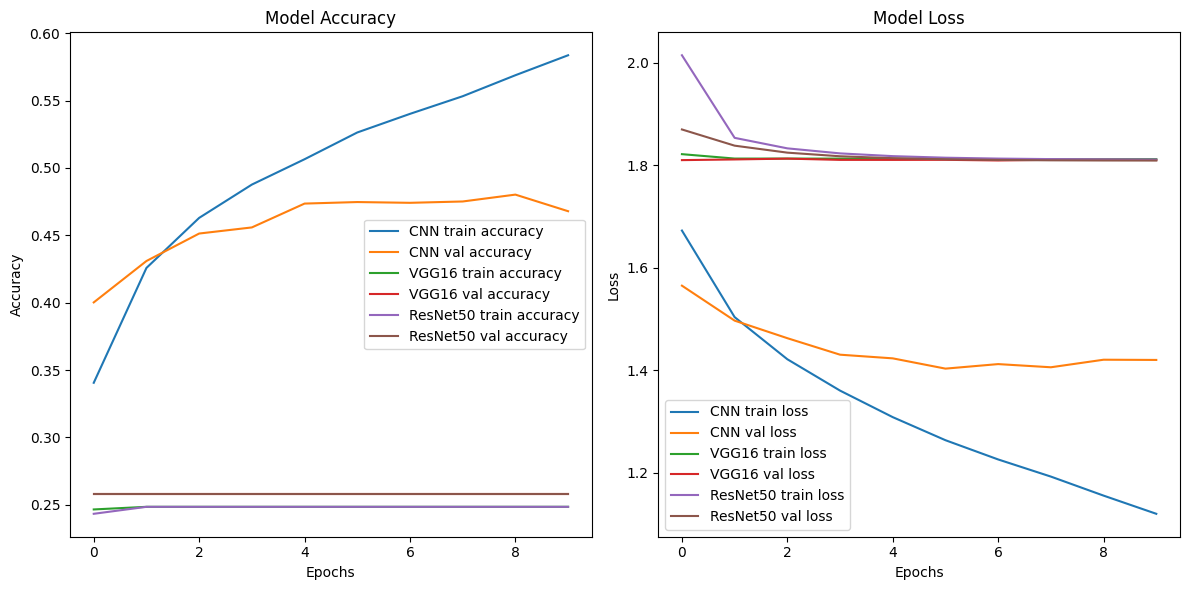

In [5]:
# Step 8: Evaluate the models

# CNN Model Evaluation
cnn_loss, cnn_accuracy = cnn_model.evaluate(val_generator)
print(f"CNN Model - Loss: {cnn_loss}, Accuracy: {cnn_accuracy}")

# VGG16 Model Evaluation
vgg16_loss, vgg16_accuracy = vgg16_model.evaluate(val_generator)
print(f"VGG16 Model - Loss: {vgg16_loss}, Accuracy: {vgg16_accuracy}")

# ResNet50 Model Evaluation
resnet50_loss, resnet50_accuracy = resnet50_model.evaluate(val_generator)
print(f"ResNet50 Model - Loss: {resnet50_loss}, Accuracy: {resnet50_accuracy}")

# Step 9: Plot training and validation accuracy/loss curves

# Accuracy Plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN train accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN val accuracy')
plt.plot(vgg16_history.history['accuracy'], label='VGG16 train accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 val accuracy')
plt.plot(resnet50_history.history['accuracy'], label='ResNet50 train accuracy')
plt.plot(resnet50_history.history['val_accuracy'], label='ResNet50 val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plots
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN train loss')
plt.plot(cnn_history.history['val_loss'], label='CNN val loss')
plt.plot(vgg16_history.history['loss'], label='VGG16 train loss')
plt.plot(vgg16_history.history['val_loss'], label='VGG16 val loss')
plt.plot(resnet50_history.history['loss'], label='ResNet50 train loss')
plt.plot(resnet50_history.history['val_loss'], label='ResNet50 val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
